In [150]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats
from matplotlib.pyplot import MultipleLocator
import pandas as pd

In [151]:
x = [0] * 109 + [1] * 65 + [2] * 22 + [3] * 3 + [4] * 1 + [5] * 0 + [6] * 0
print(x)
n = len(x)
alpha = 0.05
#Гипотеза H_0: Выборка из количества радиоактивных распадов за единицу времени
#распределённа по закону Пуассона
n

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4]


200

Минимальный член выборки:  0
Максимальный член выборки:  4
Размах выборки:  4
Число интервалов:  7
Длина интервалов:  1
Границы интервалов:
 [0, 1, 2, 3, 4, 5, 6]
Относительные частоты:
 [0.545, 0.325, 0.11, 0.015, 0.005, 0.0, 0.0]
Высоты столбцов гистограммы:
 [0.545, 0.325, 0.11, 0.015, 0.005, 0.0, 0.0]


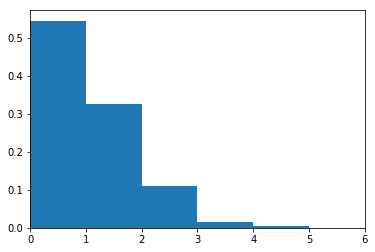

Выборочное среднее:  0.61
Cреднее квадратичное отклонение:  0.6079000000000001


In [152]:
from IPython.core.display import display, HTML
display(HTML("<font color='green'>Первоначальная обработка статистических данных</font>"))

mi = min(x)

ma = max(x)

#Размах выборки
omega = ma - mi

#Группировка данных

l = 7

h = 1

borders = []
for i in range(l):
    borders.append(round((mi + i * h), 3) )

hist = [109, 65, 22, 3, 1, 0, 0]

r_f = [0] * l
for i in range (0, l):
    r_f[i] = hist[i] / len(x)

hight = []
for i in range(l):
    hight.append(round((r_f[i] / h), 3))

##Гистограмма относительных частот
plt.hist(x, 
         bins = np.arange(0, 7, h),
         density = True, 
         range = (mi, ma))
plt.xlim(0, 6)

##Выборочные характеристики выборки x
x_mean = np.mean(x)

x_s = np.var(x)

print("Минимальный член выборки: ", mi)
print("Максимальный член выборки: ", ma)
print("Размах выборки: ", omega)
print("Число интервалов: ", l)  
print("Длина интервалов: ", h)  
print("Границы интервалов:\n", borders)
print("Относительные частоты:\n", r_f)
print("Высоты столбцов гистограммы:\n", hight)
display(HTML("<font color='Black'>Гистограмма относительных частот</font>"))
plt.show()
print("Выборочное среднее: ", x_mean)
print("Cреднее квадратичное отклонение: ", x_s)

In [153]:
#Для распределения хи-квадрат
#Первый момент = lambda (находим методом моментов)

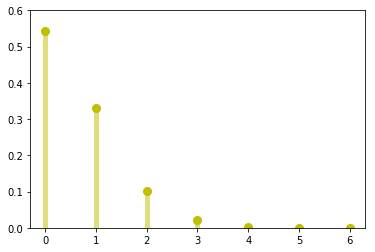

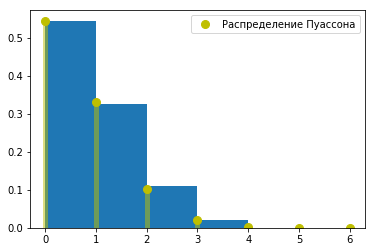

In [154]:
fig, ax = plt.subplots(1, 1)
lambd = x_mean
display(HTML("<font color='green'>График, соответствующий гипотезе H_0:</font>"))
x_1 = np.arange(0, 7)
ax.plot(x_1, scipy.stats.poisson.pmf(x_1, lambd), 'bo', color='y', ms=8)
ax.vlines(x_1, 0, scipy.stats.poisson.pmf(x_1, lambd), colors='y', lw=5, alpha=0.5)
plt.ylim(0, 0.6)
plt.show()
plt.hist(x, 
         bins = np.arange(mi, ma + 1, h),
         density = True, 
         range = (mi, ma))
x_1 = np.arange(0, 7)
plt.plot(x_1, scipy.stats.poisson.pmf(x_1, lambd), 'bo', color='y', ms=8, label='Распределение Пуассона')
plt.vlines(x_1, 0, scipy.stats.poisson.pmf(x_1, lambd), colors='y', lw=5, alpha=0.5)
display(HTML("<font color='green'>Совмещённый график гистограммы и распределения Пуассона с lambda = 0.665</font>"))
plt.legend()
plt.show()

In [149]:
teor_frequency = [] * l
for i in range(l):
    teor_frequency.append(n * ((lambd) ** i) / math.factorial(i) * math.exp(-lambd))
frequency = pd.DataFrame({'Имперические частоты': hist,
                          'Теоретические частоты': teor_frequency})
print(frequency)
display(HTML("<font color='green'>Объединим последние четыре интервала</font>"))
merge1 = np.sum(teor_frequency[2:l]) 
teor_frequency = teor_frequency[0:2] + [merge1]
print(teor_frequency)
hi_kv_b = [0] * len(teor_frequency)
for i in range(len(teor_frequency)):
    hi_kv_b[i] = ((hist[i] - teor_frequency[i]) ** 2) / teor_frequency[i]
display(HTML("<font color='green'>X^2b = </font>"))
print(np.sum(hi_kv_b))
display(HTML("<font color='green'>Число степеней свободы: 3 - 1 - 1</font>"))
m = len(teor_frequency) - 1 - 1
display(HTML("<font color='green'>X^2alpha = </font>"))
print(scipy.stats.chi2.ppf(1 - alpha, m))

   Имперические частоты  Теоретические частоты
0                   109             108.670174
1                    65              66.288806
2                    22              20.218086
3                     3               4.111011
4                     1               0.626929
5                     0               0.076485
6                     0               0.007776


[108.67017381489997, 66.28880602708898, 25.04028713726671]


0.3951973698600031


3.841458820694124


In [155]:
display(HTML("<font color='black'>Вывод: Гипотеза H_0: Выборка из количества радиоактивных распадов за единицу времени распределённа по закону Пуассона </font><font color='red'>принимается </font><font color='black'>на уровне доверия 0,95.</font>")) 